# 1. 모듈 import 및 install

In [ ]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

# 2. MP Holistic을 이용한 Keypoints 설정

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model 불러오기
mp_drawing = mp.solutions.drawing_utils # Drawing utilities, 그리는 tool 불러오기

In [3]:
def mediapipe_detection(image, model):             # mediapipe 영상 감지 함수 만들기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 색상 변환: BGR -> RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # 색상 변환: RGB -> BGR
    return image, results
# 웹캠으로 연결되었을 때, 스켈레톤을 인식해주는 함수를 만들어주는 과정입니다

In [4]:
# 내가 원하는 color, thickness, circle_radius 설정 가능
# 스켈레톤의 스타일을 설정하는 함수힙니다.
def draw_styled_landmarks(image, results):
    # 얼굴 점과 선을 이어주기
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,           # FACEMESH_CONTOURS 모델 가져오기
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), # landmark 색 (스켈레톤 점)
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) # connections 색 (점을 이어주는 선)
                             ) 
    # 몸의 점과 선을 이어주기
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,            # 몸의 점들을 이어주는 선
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),  # landmark 색
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)  # connections 색
                             ) 
    # 왼손 점과 선을 이어주기
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,       # 왼손의 점들을 이어주는 선
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), # landmark 색
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2) # connections 색
                             ) 
    # 오른손 점과 선을 이어주기  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,       # 오른손의 점들을 이어주는 선
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), # landmark 색
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)  # connections 색
                             ) 

In [5]:
#캠 인식하기

cap = cv2.VideoCapture(0) # 만약 창이 popup이 안되면 0,1 ,2 다 시도해 볼 것. 

# mediapipe 모델 웹캠에 적용시키기
with mp_holistic.Holistic(min_detection_confidence=0.5,  # confidence 조절 가능, 처음 화면 열었을 때 정확도에 따른 감지확률
                          min_tracking_confidence=0.5) as holistic: #tracking은 트랙킹할 때 
    while cap.isOpened():

        # 웹캠 읽어오기
        ret, frame = cap.read()

        # 영상 감지
        image, results = mediapipe_detection(frame, holistic)
        
        # 점과 선을 이어주는 함수 (landmarks 및 connections)
        draw_styled_landmarks(image, results)

        # 윈도우창 이름 및 웹캠 보여주기
        cv2.imshow('OpenCV Feed', image) #'' 안에는 내가 원하는 창 이름

        # # q 누르면 stop
        if cv2.waitKey(10)== ord('q'): 
            break
    cap.release()
    cv2.destroyAllWindows()

# 3. Keypoint 값들 추출하기

In [6]:
results.pose_landmarks
# 화면에 인식된 key point의 좌표를 보면 x, y, z, visibility 4개의 좌표가 존재한다

landmark {
  x: 0.25705593824386597
  y: 0.5505721569061279
  z: -0.4116079807281494
  visibility: 0.999767005443573
}
landmark {
  x: 0.27965953946113586
  y: 0.49041396379470825
  z: -0.4771682620048523
  visibility: 0.9997372031211853
}
landmark {
  x: 0.2936967611312866
  y: 0.4856230616569519
  z: -0.4771639406681061
  visibility: 0.9997650980949402
}
landmark {
  x: 0.31007593870162964
  y: 0.48036623001098633
  z: -0.47751298546791077
  visibility: 0.9997835755348206
}
landmark {
  x: 0.2519364655017853
  y: 0.4951815903186798
  z: -0.3678537607192993
  visibility: 0.9996533989906311
}
landmark {
  x: 0.246699720621109
  y: 0.4935755431652069
  z: -0.3671078085899353
  visibility: 0.9996374845504761
}
landmark {
  x: 0.24206562340259552
  y: 0.49224600195884705
  z: -0.36753496527671814
  visibility: 0.9996423721313477
}
landmark {
  x: 0.38445529341697693
  y: 0.4807775318622589
  z: -0.551956295967102
  visibility: 0.9998824596405029
}
landmark {
  x: 0.2959124445915222
  y: 0

In [7]:
results.face_landmarks
# pose와는 다르게 face 및 hand의 key point는 x, y, z 3개의 좌표가 존재

landmark {
  x: 0.25405728816986084
  y: 0.6030415892601013
  z: -0.01946922391653061
}
landmark {
  x: 0.23879040777683258
  y: 0.5678139925003052
  z: -0.04125615209341049
}
landmark {
  x: 0.25240644812583923
  y: 0.5769308805465698
  z: -0.020632052794098854
}
landmark {
  x: 0.2366061806678772
  y: 0.5242679119110107
  z: -0.027487877756357193
}
landmark {
  x: 0.23658102750778198
  y: 0.5551487803459167
  z: -0.04446161165833473
}
landmark {
  x: 0.23854464292526245
  y: 0.5373216867446899
  z: -0.04201555252075195
}
landmark {
  x: 0.24766471982002258
  y: 0.4915129244327545
  z: -0.023732487112283707
}
landmark {
  x: 0.21455465257167816
  y: 0.4873391389846802
  z: 0.04657059535384178
}
landmark {
  x: 0.24753467738628387
  y: 0.458016961812973
  z: -0.019871238619089127
}
landmark {
  x: 0.24462774395942688
  y: 0.44126248359680176
  z: -0.02220691554248333
}
landmark {
  x: 0.24390053749084473
  y: 0.3780089020729065
  z: -0.017626576125621796
}
landmark {
  x: 0.25541460514

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# mediapipe로 인식된 key point들을 추출(extract)하여array에 담아주는 for문
# 위의 extract_keypoints함수는 아래의 for 문을 list comprehension한 것이다.
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

# 만약에 인식되지 못한 keypoint가 있으면 그 부분을 0(zero)으로 채워주는 작업을 해야 오류가 생기지 않는다.
# 즉, 0(zero)으로 채워주는 갯수는 len(results.left_hand_landmarks): 21개 point와 3개의 좌표이므로 (21*3)개의 0이 필요하다
# pose와 face도 같은 방식으로 인식되지 않았을 경우 0을 채워준다.
# 총 keypoint 값들은 468*3 + 33*4 + 21*3 + 21*3 = 1662개

In [15]:
#위에서 만든 keypoint 추출 함수를 사용
result_test = extract_keypoints(results)

In [16]:
# numpy array에 좌표값들이 들어가 있으며 인식되지않은 부분은 0으로 채워져 있는 것을 확인
result_test

array([ 0.25705594,  0.55057216, -0.41160798, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
# 위의 좌표값들을 '0' 이라는 이름의 numpy 파일로 저장해줌
np.save('0', result_test)

In [18]:
# 위에 저장된 numpy 파일 불러오기
# 이 파일들은 뒤에서 학습을 시키기위해 설정한 프레임수의 numpy파일(즉, 20프레임 설정시 20개 numpy 파일)로 저장할 때 사용
np.load('0.npy')

array([ 0.25705594,  0.55057216, -0.41160798, ...,  0.        ,
        0.        ,  0.        ])

# 4. 데이터 수집을 위한 폴더 경로 설정 

In [19]:
# numpy arrays 및 파일 저장 path
DATA_PATH = os.path.join('수화_Data') 

# 우리가 학습할 단어들의 모션 감지
actions = np.array(['나','너','사랑','목','아프다','도와줘'])

# 30개 영상분의 데이터
no_sequences = 30

# 영상 1개당 20프레임의 길이로 설정(프레임이 길수록 학습할 수 있는 시간이 길어지고 실시간 탐지시에 감지가 느려질 수 있음)
sequence_length = 20

# Folder start
start_folder = 0

In [149]:
# 첫 실행시 폴더만들기
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
        
# 여러가지 학습 데이터 폴더를 만듦
# ex)
# '나' 0~29개(no_sequences 수만큼)

In [44]:
# 학습 데이터 30개 이상 됐을시 위 start_folder를 변경후 이 것을 실행할 것
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'MP_Data\\hello'

# 5. Train 과 Test를 위한 Keypoint 값 수집 

In [150]:
#캠 인식하기
cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # 추가된 루프
    # 위 원하는 모션 감지를 위해 actions에 설정된 리스트
    for action in actions:
        # 위에 설정된 start_folder와 no_sequence의 수만큼 돌아가는 for문 
        for sequence in range(start_folder, start_folder+no_sequences):
            # 위에 설정된 sequence_length(한 영상당 프레임)의 수만큼 돌아가는 for문
            for frame_num in range(sequence_length):

                # 웹캠 읽기
                ret, frame = cap.read()

                # 영상 감지
                image, results = mediapipe_detection(frame, holistic)

                # 스켈레톤 입히기
                draw_styled_landmarks(image, results)
                
                # NEW 학습시간 사이에 대기시간 넣기(모션캡쳐 시작부터 끝날 때까지 위치 초기화 및 위치 이동을 위하여 중간에 breaktime을 줌)
                if frame_num == 0: # 새로운 영상 학습이 시잘될 때
                    #아래 두 줄은 그냥 화면에 text 넣는거라 빼도 됨 optional
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # 웹캠 보여주기
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # 웹캠 보여주기
                    cv2.imshow('OpenCV Feed', image)
                
                # 위에서 만든 keypoint 추출 함수
                # 학습을 통해 추출된 keypoint들을 위에서 설정한 경로에 생성함
                # ex) 수화_Data/도와줘/0/0.npy ... 수화_Data/도와줘/0/29.npy
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # q 누르면 stop
                if cv2.waitKey(10)== ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. 데이터 전처리 및 Labels 와 Features 만들기

In [20]:
from sklearn.model_selection import train_test_split  # 학습한 데이터를 train과 test set으로 나누기 위한 모듈 불러오기
from tensorflow.keras.utils import to_categorical     # 원-핫 인코딩을 위한 모듈 불러오기

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'나': 0, '너': 1, '사랑': 2, '목': 3, '아프다': 4, '도와줘': 5}

In [27]:
sequences, labels = [], [] # sequences는 추출된 데이터값, labels는 위 label_map의 튜플값
for action in actions:    # 학습 시킨 모션들
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int): #0~29개의 영상(sequences)
        window = []
        for frame_num in range(sequence_length): # 
            # 학습시 저장된 영상의 0~19(20개)numpy arrays 들을 불러와서 window 리스트에 붙여주기
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
# 0~29개(30개)의 각각의 영상에서 저장된 0~19(20개)의 numpy arrays 들을 window 리스트에 담아주고 그 window에 저장된 numpy arrays를 
# sequences 리스트에 다 담아줌
# labels 리스트에는 각 action이 무엇인지 0 ~ len(actions)만큼 담아준다. 즉, [0, .... ,5] 까지 담겨있음. (6 * 30) 180개의 labels

In [28]:
# 총 6개의 actions * 30, 20프레임씩, 1662개의 keypoint
np.array(sequences).shape

(180, 20, 1662)

In [29]:
# 총 6개의 actions * 30
np.array(labels).shape

(180,)

In [30]:
X = np.array(sequences)

In [34]:
X

array([[[ 0.38701209,  0.44132164, -0.38784519, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43687773,  0.43625119, -0.93934393, ...,  0.51459253,
          0.8778432 , -0.03138749],
        [ 0.45317316,  0.43599156, -0.99233186, ...,  0.51320094,
          0.88305706, -0.03993764],
        ...,
        [ 0.44254455,  0.44157633, -0.94487494, ...,  0.47751832,
          0.92264932, -0.03830705],
        [ 0.44093379,  0.439657  , -0.93975401, ...,  0.47908035,
          0.9211843 , -0.03565655],
        [ 0.438546  ,  0.43593538, -0.94050944, ...,  0.48495835,
          0.91713649, -0.03118621]],

       [[ 0.43828207,  0.43538484, -1.00139534, ...,  0.48872605,
          0.91673875, -0.03239727],
        [ 0.4520852 ,  0.43541363, -0.96262872, ...,  0.50563753,
          0.87083572, -0.0269775 ],
        [ 0.45621252,  0.43512434, -0.93898809, ...,  0.50142926,
          0.87236536, -0.03158712],
        ...,
        [ 0.46377668,  0.43098271, -0.83835745, ...,  

In [31]:
X.shape

(180, 20, 1662)

In [32]:
# labels 리스트를 원 핫 인코딩
y = to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [35]:
# train과 test set으로 나누어줌. test size는 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_test.shape

(9, 6)

# 7. LSTM 신경망(Neural Network)을 이용한 구축 및 학습

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

#Tensor board 사용 순서
# cmd(command창) open -> Logs가 저장된 폴더로 이동 -> train 폴더 이동 -> 그 안에 tensorboard 파일 
# -> dir친 후 v2 파일 긁어서 복사 -> tensorboard --logdir=. -> localhost 복사 후 웹페이지로 열기

In [39]:
early_stopping_callback = EarlyStopping(monitor='categorical_accuracy', patience=300)
# categorical_accuracy 모니터링, patience 값 동안 같은 값이 나오면 조기종료

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662))) #20프레임, 1662개의 input 값
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))   # 다음에 Dense층이기 때문에 return_sequences를 false로 하는 것
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # actions.shape[0] : actions 갯수 , 다중분류: softmax: 합이 1인 value로 나눔

#확률이 가장 높은 위치의 것? (ex: res[0]: [0.xx, 0.99, 0.xx] 이것의 합은 1이 나옴 즉, predict하고 나온 값은 모션들 중[hello, thanks, iloveyou]
#값중에서 가운데의 값(thanks)이 99%확률로 예측했다는 것

#왜 LSTM과 mediapipe를 썼나?
#1. 적은 데이터 필요
#2. 학습이 빠름
#3. 신경망이 간단(simpler)하며, 실시간 감지가 빠름

In [41]:
# 컴파일 (환경 설정)
model.compile(loss='categorical_crossentropy', optimizer='Adam',  metrics=['categorical_accuracy'])
#loss='categorical_crossentropy' 사용은 다중 분류시에 사용함(multi-class classification)

In [185]:
# 학습하기
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback, early_stopping_callback])
# epochs는 적은양의 데이터만 있다면 좀 더 높게 잡아도 됨
# early stopping을 사용해도 됨 - 우리 배운 거니까 사용해보자
# 여기서 overfitting이 일어남 주의* 
# overfitting 징조: loss값이 증가하기 시작하면 학습을 멈출 것

Epoch 1/2000
6/6 [==============================] - 3s 58ms/step - loss: 2.0478 - categorical_accuracy: 0.2047
Epoch 2/2000
6/6 [==============================] - 0s 57ms/step - loss: 2.1730 - categorical_accuracy: 0.2164
Epoch 3/2000
6/6 [==============================] - 0s 49ms/step - loss: 1.7960 - categorical_accuracy: 0.1696
Epoch 4/2000
6/6 [==============================] - 0s 53ms/step - loss: 1.7789 - categorical_accuracy: 0.1696
Epoch 5/2000
6/6 [==============================] - 0s 53ms/step - loss: 1.8106 - categorical_accuracy: 0.1988
Epoch 6/2000
6/6 [==============================] - 0s 52ms/step - loss: 1.7455 - categorical_accuracy: 0.3392
Epoch 7/2000
6/6 [==============================] - 0s 67ms/step - loss: 1.7122 - categorical_accuracy: 0.2924
Epoch 8/2000
6/6 [==============================] - 0s 56ms/step - loss: 1.5696 - categorical_accuracy: 0.3450
Epoch 9/2000
6/6 [==============================] - 0s 49ms/step - loss: 1.3081 - categorical_accuracy: 0.4386
E

KeyboardInterrupt: 

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 596,774
Trainable params: 596,774
Non-trai

# 8. 예측하기

In [45]:
res = model.predict(X_test) # 예측은 test데이터로

In [49]:
# np.argmax: 가장 높은 값의 index를 불러옴
# 예측값과 실제값을 비교하기
actions[np.argmax(res[1])]

'도와줘'

In [48]:
# 실제값과 위의 예측값이 같아짐
actions[np.argmax(y_test[1])]

'도와줘'

# 9. 모델(가중치) 저장 및 불러오기

In [190]:
# 모델 저장
model.save('action6.h5')

In [ ]:
# del model

In [44]:
# 모델 불러오기
model.load_weights('action6.h5')

# 10. Confusion Matrix와 Accuracy score를 사용한 결과 평가

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
# TP와 TN의 값이 잘 나온 것을 확인
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 2]],

       [[7, 0],
        [0, 2]],

       [[6, 0],
        [0, 3]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

1.0

In [55]:
#train인으로 확인해보기
yhat = model.predict(X_train)

In [56]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [57]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[143,   0],
        [  0,  28]],

       [[143,   0],
        [  0,  28]],

       [[144,   0],
        [  0,  27]],

       [[141,   0],
        [  0,  30]],

       [[142,   0],
        [  0,  29]],

       [[142,   0],
        [  0,  29]]], dtype=int64)

In [58]:
accuracy_score(ytrue, yhat)

1.0

# 11. 실시간 테스트하기

In [59]:
from scipy import stats
from PIL import ImageFont, ImageDraw, Image

In [60]:
font = ImageFont.truetype('fonts/gulim.ttc', 30)
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, sentence, input_frame, colors):
    output_frame = input_frame.copy()
    
    # show prob
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
    
    # show text box
    cv2.rectangle(output_frame, (0,0), (640, 40), (245, 117, 16), -1) # 텍스트박스
    
    # show sentence text
    output_frame = Image.fromarray(output_frame)
    draw = ImageDraw.Draw(output_frame)
    draw.text((3,3) , ' '.join(sentence), font=font, fill= (255,255,255))
    
    # show prob text
    for num, prob in enumerate(res):
        draw.text((0, 60+num*40), actions[num], font=font, fill= (255,255,255))

        
    return np.array(output_frame)

In [61]:
# 1. New detection variables
sequence = []     # 30프레임을 저장하는 리스트
sentence = []     # 모션을 detect하고 단어가 여기 들어감
predictions = []  # 예측한 actions 저장하는 리스트
threshold = 0.90  # 정확도을 어느정도로 할 것인지 조절

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # 웹캠 읽기
        ret, frame = cap.read()

        # 영상 감지
        image, results = mediapipe_detection(frame, holistic)
        
        # 실시간으로 화면(frame)에 랜드마크 그려줌
        draw_styled_landmarks(image, results)
        
        # 2. 예측하기 
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-1*sequence_length:] 
        # 가장 마지막 20개의 프레임의 key point 들을 sequence로 정해줌. 가장 최근 key point로 예측하기 위함
        
        if len(sequence) == 20: # 프레임이 20개가 찍히면 모션이 무엇인지 예측함
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res)) # 가장 높은 값의 인덱스를 predictions의 리스트에 저장
            
            
        #3. visual 향상(막대 그래프로 보여주기)
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 6: 
                sentence = sentence[-6:]

            # Viz probabilities
            image = prob_viz(res, actions, sentence, image, colors)

        
        # 웹캠 보여주기
        cv2.imshow('OpenCV Feed', image)

        # q 누르면 stop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [207]:
sentence

['목', '나', '사랑', '너', '아프다', '너']

# 12. 네이버 api 번역기 사용 방식

In [62]:
import requests

def get_translate_e2k(text): #영어를 한글로 번역하는 함수
    client_id = "k038Ur522FOy97b7bMCf" # <-- client_id 기입
    client_secret = "CIZzoba2C3" # <-- client_secret 기입

    data = {'text' : text,
            'source' : 'en',
            'target': 'ko'}

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data=data)
    rescode = response.status_code

    if(rescode==200):
        send_data = response.json()
        trans_data = (send_data['message']['result']['translatedText'])
        return trans_data
    else:
        print("Error Code:" , rescode)
        
def get_translate_k2e(text): #한글을 영어로 변환하는 함수
    client_id = "k038Ur522FOy97b7bMCf" # <-- client_id 기입
    client_secret = "CIZzoba2C3" # <-- client_secret 기입

    data = {'text' : text,
            'source' : 'ko',
            'target': 'en'}

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data=data)
    rescode = response.status_code

    if(rescode==200):
        send_data = response.json()
        trans_data = (send_data['message']['result']['translatedText'])
        return trans_data
    else:
        print("Error Code:" , rescode)

In [63]:
text_base='너 머리 예쁘다.'

text_en= get_translate_k2e(text_base)
print(text_en)
text_kr= get_translate_e2k(text_en)
print(text_kr)

Your hair is pretty.
머리 예쁘네요.


In [64]:
from gtts import gTTS
__author__ = 'info-lab'

tts = gTTS(
    text=text_kr, #음성으로 전환할 텍스트
    lang='ko', slow=False) #언어는 한글
tts.save('ex_ko.mp3')

In [65]:
df=pd.DataFrame({'id':['a1','a2'],
                 'text_base':['나 사랑 너','나 목 아프다 병원 어디'],
                 'text_en':['I love you.', 'My throat hurts. Where in the hospital?'],
                'text_kr':['사랑해요','목이 아파요. 병원 어디에요?']})
df

,id,text_base,text_en,text_kr
0,a1,나 사랑 너,I love you.,사랑해요
1,a2,나 목 아프다 병원 어디,My throat hurts. Where in the hospital?,목이 아파요. 병원 어디에요?


# 13. 수어 통계

In [66]:
print('수어 전체 개수: {}'.format(len(df)))
#수어 전체길이 확인
sl_length = df['text_kr'].astype(str).apply(len)
sl_length.head()

수어 전체 개수: 2


0     4
1    16
Name: text_kr, dtype: int64

In [67]:
#수어 통계 정보
print('수어 길이 최댓값: {}'.format(np.max(sl_length)))
print('수어 길이 최솟값: {}'.format(np.min(sl_length)))
print('수어 길이 평균값: {:.2f}'.format(np.mean(sl_length)))
print('수어 길이 표준편차: {:.2f}'.format(np.std(sl_length)))
print('수어 길이 중간값: {}'.format(np.median(sl_length)))
print('수어 길이 제1사분위: {}'.format(np.percentile(sl_length,25)))
print('수어 길이 제3사분위: {}'.format(np.percentile(sl_length,75)))

수어 길이 최댓값: 16
수어 길이 최솟값: 4
수어 길이 평균값: 10.00
수어 길이 표준편차: 6.00
수어 길이 중간값: 10.0
수어 길이 제1사분위: 7.0
수어 길이 제3사분위: 13.0


# 14. Wordcloud

In [68]:
# 문자열 아닌 데이터 모두 제거
sls = [signlanguage for signlanguage in df['text_base'] if type(signlanguage) is str]
#df['text_base']의 값중 문자이면 값을 출력
sls
#혹시 모를 문자가 아닌 부분 제거

['나 사랑 너', '나 목 아프다 병원 어디']

In [69]:
from eunjeon import Mecab
tagger = Mecab()

sl_nouns = [] #수어의 명사만 담을 리스트 생성
for sl in sls: #문자열인 수어 기본형에서 
    for noun in tagger.nouns(sl): #명사만을 
        sl_nouns.append(noun) #수어의 명사만을 담는 리스트로 담기
            
sl_nouns

['나', '사랑', '너', '나', '목', '병원', '어디']

In [70]:
from collections import Counter
# 시퀀스 자료형의 데이터 요소 개수를 딕셔너리 형태로 반환하는 자료구조
    # 요소 중 값이 같은 것이 몇 개인지 반환한다.
num_top_nouns = 6 #가장 많이 나온 명사 6개
sl_nouns_counter = Counter(sl_nouns) #명사의 게수를 센값
sl_top_nouns = dict(sl_nouns_counter.most_common(num_top_nouns)) # dict() 저장 
#많이 나온 상위 단어 6개을 센것
sl_top_nouns

{'나': 2, '사랑': 1, '너': 1, '목': 1, '병원': 1, '어디': 1}

In [71]:
from wordcloud import WordCloud

font = 'NanumBarunGothic.ttf'

sl_wc = WordCloud(background_color="white", font_path=font)
sl_wc.generate_from_frequencies(sl_top_nouns)

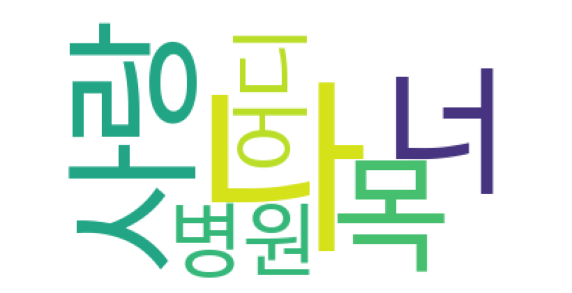

In [72]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(sl_wc)

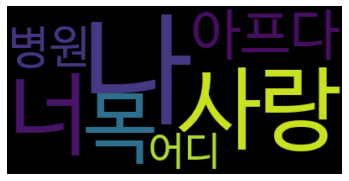

In [73]:
# 한글 폰트 설정
wordcloud = WordCloud(font).generate(' '.join(sls))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 15. 감성 분석

In [74]:
dic1 = open('./dict/positive-words.txt')#긍정어
dic2 = open('./dict/negative-words.txt')#부정어

positive_words=[]
negative_words=[]

for line in dic1:
    positive_words.append(line.strip('\n'))# 긍정어를 담기
for line in dic2:
    negative_words.append(line.strip('\n'))#부정어를 담기

In [75]:
user_id = df.get('id') #df의 id열에 있는 값들
text_e = df.get('text_en')

slanguage = {user_id[0]:text_e[0]}
slanguage

{'a1': 'I love you.'}

In [76]:
for i in range(len(text_e)):#텍스트의 길이의 범위까지 숫자에서
    if slanguage.get(text_e[i]) != None:#만약 빈칸이 아니라면
        slanguage[user_id[i]] = slanguage.get(user_id[i]) + "\n" + text_e[i]
    else:
        slanguage[user_id[i]] = text_e[i]

slanguage.get('a1')

'I love you.'

In [77]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Psw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
tokens=[]

for f, t in slanguage.items():
    token=word_tokenize(t)
    tokens.append([f,token])

In [79]:
tokens

[['a1', ['I', 'love', 'you', '.']],
 ['a2', ['My', 'throat', 'hurts', '.', 'Where', 'in', 'the', 'hospital', '?']]]

In [80]:
# 감정분석을 위해 각 토큰마다 긍정(+1), 부정(-1)로 계산
# 전체 단어의 수로 나누어 각 기업마다 긍정-부정 정도 계산

sentiment_user=[]

for token in tokens:
    
    u_id=token[0] #a1,a2
    sentiment=0
    count=0
    
    for t in token[1]: # ['I', 'love', 'you', '.']
        if t in positive_words:
            sentiment+=1
            count+=1
        elif t in negative_words:
            sentiment -=1
            count+=1
    if count==0:#중립어로만 이루어진 문장 대비
        count+=1
            
    
    sentiment_user.append([u_id,sentiment/count])

sentiment_user[0:10]

[['a1', 1.0], ['a2', -1.0]]

In [81]:
a=[]

for firm in sentiment_firm:
    a.append(firm[1]*100)

X=np.arange(len(a))

plt.title("sentiment(%)",fontsize=20)
plt.bar(X,a)
plt.show()

NameError: name 'sentiment_firm' is not defined

In [85]:
# !pip install py_lex # 세분화된 감성분석 위한 라이브러리 

from py_lex import Liwc, EmoLex
import pandas as pd

# py_lex 감정어휘집 
emotion_dic=pd.read_excel('./dict/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations_ENG.xlsx')

df=emotion_dic.set_index('English (en)')

In [87]:
emotion_sl=[]

for token in tokens:
    u_id=token[0]
    sentiment=0
    count=0
    
    arr=[]
    senti_count=0
    
    for t in token[1]:
        if t in df.index:
            count+=1
            arr.append(list(df.loc[t]))
            if np.sum(list(df.loc[t]))!=0:
                senti_count+=1
    emotion_sl.append([u_id,np.sum(arr,axis=0),senti_count/count])

emotion_sl[0:10]

[['a1', array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]), 1.0],
 ['a2', array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1]), 0.5]]

In [88]:
emotion_result=[]

for firm in emotion_sl:
    emotion_result.append({"Firm" : firm[0],
                           "Positive": str("%0.2f"%( firm[1][0]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Negative" : str("%0.2f"%( firm[1][1]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anger" : str("%0.2f"%( firm[1][2]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anticipation" : str("%0.2f"%( firm[1][3]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Disgust" : str("%0.2f"%( firm[1][4]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Fear" : str("%0.2f"%( firm[1][5]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Joy" : str("%0.2f"%( firm[1][6]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sadness" : str("%0.2f"%( firm[1][7]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Surprise" : str("%0.2f"%( firm[1][8]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Trust" : str("%0.2f"%( firm[1][9]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sentiwords / non-sentiwords (%)":str("%0.2f"%(firm[2]*100))+"%"}
                          )
emotion_result[0:10]

C:\Users\Psw\AppData\Local\Temp\ipykernel_31156\1911870767.py:5: RuntimeWarning: invalid value encountered in long_scalars
  "Positive": str("%0.2f"%( firm[1][0]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Users\Psw\AppData\Local\Temp\ipykernel_31156\1911870767.py:6: RuntimeWarning: invalid value encountered in long_scalars
  "Negative" : str("%0.2f"%( firm[1][1]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Users\Psw\AppData\Local\Temp\ipykernel_31156\1911870767.py:7: RuntimeWarning: invalid value encountered in long_scalars
  "Anger" : str("%0.2f"%( firm[1][2]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Users\Psw\AppData\Local\Temp\ipykernel_31156\1911870767.py:8: RuntimeWarning: invalid value encountered in long_scalars
  "Anticipation" : str("%0.2f"%( firm[1][3]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Users\Psw\AppData\Local\Temp\ipykernel_31156\1911870767.py:9: RuntimeWarning: invalid value encountered in long_scalars
  "Disgust" : str("%0.2f"%( firm[1][4]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Use

[{'Firm': 'a1',
  'Positive': '100.00%',
  'Negative': '0.00%',
  'Anger': '0.00%',
  'Anticipation': '0.00%',
  'Disgust': '0.00%',
  'Fear': '0.00%',
  'Joy': '100.00%',
  'Sadness': '0.00%',
  'Surprise': '0.00%',
  'Trust': '0.00%',
  'Sentiwords / non-sentiwords (%)': '100.00%'},
 {'Firm': 'a2',
  'Positive': 'nan%',
  'Negative': 'nan%',
  'Anger': 'nan%',
  'Anticipation': 'nan%',
  'Disgust': 'nan%',
  'Fear': 'inf%',
  'Joy': 'nan%',
  'Sadness': 'inf%',
  'Surprise': 'nan%',
  'Trust': 'inf%',
  'Sentiwords / non-sentiwords (%)': '50.00%'}]

In [89]:
# 3차원 시각화(세분화한 감정분석 결과 시각화 >> x, y, z)

y=[]

for sl in emotion_sl:
    y.append(list(sl[1][2:]))

x=['Positive','Negative','Anger','Anticipation','Disgust','Fear','Joy','Sadness','Suprise','Trust']

z=[]
for sl in emotion_sl:
    z.append(sl[0])

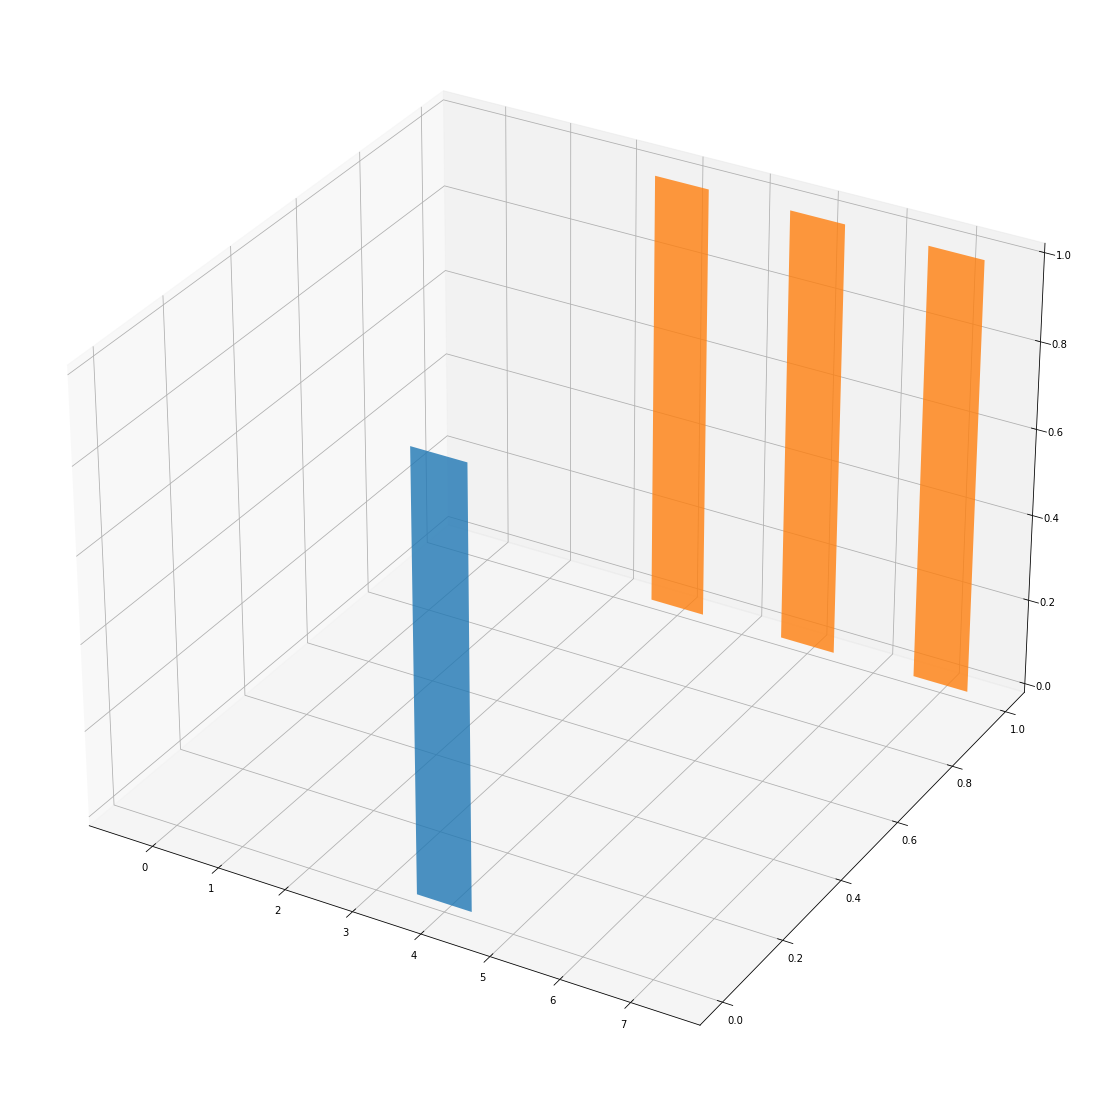

In [90]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
fig.set_size_inches(20, 20, 20)

ax = fig.add_subplot(111,projection='3d')

for sl in emotion_sl:
    xs=np.arange(8)

    ys=sl[1][2:]
    zs=emotion_sl.index(sl)
    ax.bar(xs,ys,zs,zdir='y',alpha=0.8)

plt.show()

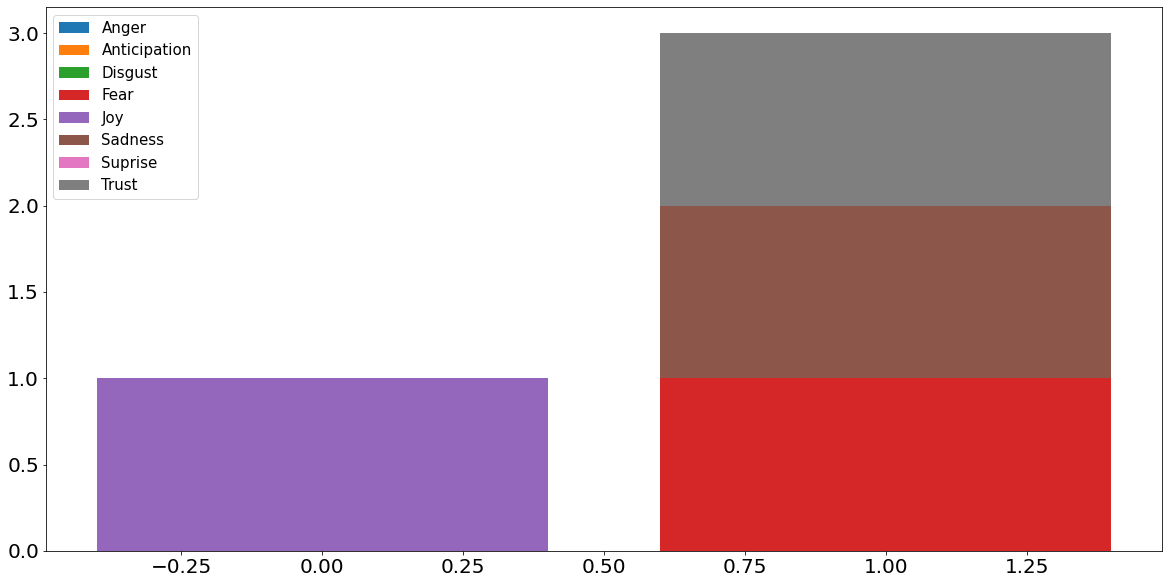

In [91]:
# 2차원 시각화 (세분화한 감정분석 결과 시각화, x: 기업, y: 감정)

E=[]

plt.rcParams["figure.figsize"]=(20,10)
plt.rcParams["ytick.labelsize"]=20
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["legend.fontsize"]=15

for sl in emotion_sl:
    E.append(sl[1][2:])

a=np.transpose(E)

X=np.arange(len(a[0])) 

plt.bar(X,a[0],label='Anger')
plt.bar(X,a[1],bottom=a[0],label='Anticipation')
plt.bar(X,a[2],bottom=sum(a[0:2]),label='Disgust')
plt.bar(X,a[3],bottom=sum(a[0:3]),label='Fear')
plt.bar(X,a[4],bottom=sum(a[0:4]),label='Joy')
plt.bar(X,a[5],bottom=sum(a[0:5]),label='Sadness')
plt.bar(X,a[6],bottom=sum(a[0:6]),label='Suprise')
plt.bar(X,a[7],bottom=sum(a[0:7]),label='Trust')

plt.xlabel="Slanguage index"
plt.legend()
plt.show()